# 主成分分析

## データの確認

In [67]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("darkgrid")
cmap = plt.get_cmap("tab10")

 
# 30次元正規乱数を6クラス、合計600個生成
data_dim = 30
data_num = 600
data_sep = 6

values = np.empty((0,data_dim),float)
sepalated =  data_num // data_sep
for i in range(data_sep):
    val = np.random.normal(i, 3, (data_dim, data_num*100))
    sigma = np.cov(val, rowvar=1, bias=1)
    values = np.block([[values],[np.random.multivariate_normal(np.random.normal(i+1, (i+1)*2, data_dim), sigma, sepalated)]])
    
# DataFrameの作成
df = pd.DataFrame({ 'Class' : [i//sepalated for i in range(data_num)]})
for i in range(data_dim):
    df['F' + str(i+1)] = values[:,i]

df.head()

,Class,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,0,0.223151,-2.806026,3.827318,4.388066,4.364943,0.788577,2.567248,1.707627,-2.304503,...,3.726145,0.804739,-4.815256,5.685646,2.299205,-0.075233,5.859315,1.940136,1.937022,2.735292
1,0,-2.585647,5.469558,-2.453645,6.265606,2.730842,-1.733258,2.765686,4.593271,3.613168,...,8.044203,0.822769,1.591489,6.730591,6.251920,4.460734,5.120529,-2.155790,-6.223300,-1.205087
2,0,-0.006051,0.613460,-1.693677,-1.891142,7.324796,-4.636299,0.961688,-0.004688,-0.781303,...,4.291116,-2.178031,0.466513,-0.471912,4.317887,2.866636,11.754517,1.249926,2.408892,0.756155
3,0,7.683822,3.272161,-1.874192,-0.041434,7.345767,-5.419983,2.053775,3.550736,-2.310236,...,-0.820303,0.949389,3.645100,-0.553299,3.012744,4.336507,0.610001,2.131894,1.689539,1.332090
4,0,2.968865,-1.364667,1.967441,2.463196,4.987903,-1.646429,3.050976,-0.719428,-0.361998,...,2.625608,-4.929303,2.113726,-1.446621,-4.408461,3.637032,7.288539,-5.344382,2.200400,1.149474


## 散布図行列を確認
- 時間がかかる上に意味もないよ

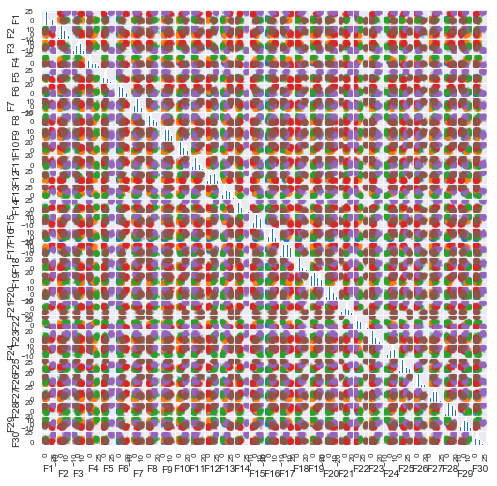

In [68]:
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=[cmap(i) for i in df.iloc[:, 0]], alpha=0.4)
plt.show()

## データの正規化

In [69]:
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,-0.615010,-1.179126,0.549206,0.141521,-0.052690,-0.409043,-0.109149,-0.319636,-1.580612,-1.319461,...,0.205365,-0.446716,-1.488128,0.524083,-0.852023,-0.485629,-0.515617,-0.472413,-0.003896,-0.493618
1,-0.892043,0.280697,-0.359250,0.375458,-0.257451,-0.815281,-0.066236,0.171262,-0.176728,-0.925767,...,0.699370,-0.445353,-0.404577,0.706954,-0.424485,0.321202,-0.657047,-1.074239,-1.266836,-1.080134
2,-0.637616,-0.575925,-0.249331,-0.640852,0.318195,-1.282926,-0.456359,-0.610930,-1.219254,-0.289493,...,0.270000,-0.672233,-0.594841,-0.553524,-0.633676,0.037653,0.612939,-0.573827,0.069134,-0.788208
3,0.120839,-0.106926,-0.275440,-0.410383,0.320823,-1.409168,-0.220190,-0.006091,-1.581972,-0.950521,...,-0.314768,-0.435780,-0.057257,-0.567767,-0.774844,0.299105,-1.520525,-0.444237,-0.042198,-0.702481
4,-0.344199,-0.924869,0.280201,-0.098313,0.025370,-0.801294,-0.004541,-0.732520,-1.119780,-0.783684,...,0.079459,-0.880248,-0.316253,-0.724104,-1.577544,0.174687,-0.242011,-1.542748,0.036866,-0.729663


## 分析

In [70]:
from sklearn.decomposition import PCA

# 主成分分析をする
pca = PCA()
pca.fit(dfs)

# データを主成分空間に写像
feature = pca.transform(values)

# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,6.160965,1.133931,-1.239665,-3.128241,-3.401646,-1.300760,1.645935,-0.870457,5.854984,-4.496750,...,-7.359676,-3.649038,0.914344,-2.672387,-2.973808,4.517022,1.785763,-0.816460,-6.673287,0.346999
1,9.985555,1.777855,-7.304751,2.116188,1.532764,-0.321994,-0.768926,-0.564099,1.791074,-1.417680,...,-4.945610,-5.401620,3.841203,-2.606657,-4.571622,7.438907,7.185781,-9.635180,-1.760348,-1.808758
2,9.458112,-6.822721,0.349910,-2.917859,5.766343,0.377590,-3.565902,-0.913699,8.941290,-0.517104,...,-1.038113,-3.401259,2.048433,-7.180911,-1.529228,4.514528,2.016084,1.700179,-1.200936,-1.325292
3,9.332238,-5.242202,-3.042833,-4.527748,3.999991,0.799442,-0.593002,-1.371913,-3.553987,-1.107859,...,-4.376237,-0.623828,1.853344,-2.146713,5.012670,4.457439,-4.974729,-2.453994,-2.490784,3.862886
4,2.736223,-3.292836,0.321866,0.531328,8.174966,-2.445148,-3.983517,-1.416925,0.640946,-2.817833,...,-5.377993,-1.771007,2.326695,-2.373620,-3.023872,1.160351,-0.594625,-5.691354,-6.582083,-1.974498


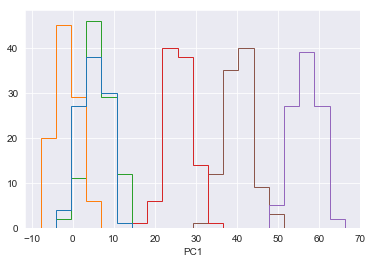

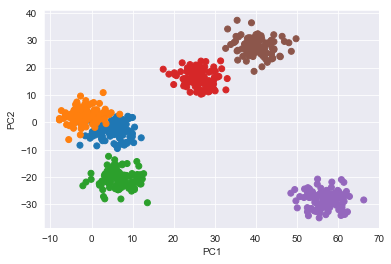

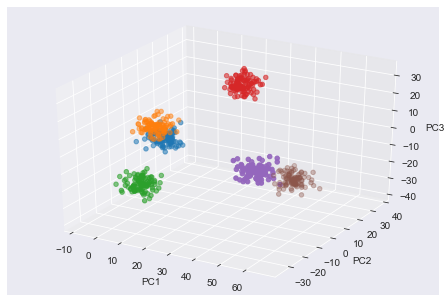

In [71]:
# 第一主成分でプロットする
fig = plt.figure()
np.histogram(feature[:, 0])
plt.hist(
    [feature[i*sepalated:(i+1)*sepalated, 0] for i in range(data_sep)],
    histtype = "step", 
# stacked = True,
    bins = 20,
    color = [cmap(i) for i in range(data_sep)])
plt.xlabel("PC1")
plt.show()

# 第１主成分と第２主成分でプロットする
fig = plt.figure()
plt.scatter(feature[:, 0], feature[:, 1], color=[cmap(i//sepalated) for i in range(data_num)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 第１主成分と第２主成分と第３主成分でプロットする
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(feature[:, 0], feature[:, 1],feature[:, 2], color=[cmap(i//sepalated) for i in range(data_num)])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## 寄与率と累積寄与率

In [72]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.290549
PC2,0.259345
PC3,0.175436
PC4,0.060343
PC5,0.032980
PC6,0.015283
PC7,0.014954
PC8,0.013399
PC9,0.011100
PC10,0.009943


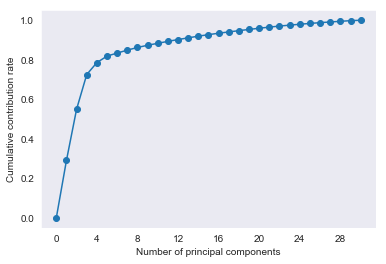

In [73]:
# 累積寄与率
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

# 寄与度
- 各ベクトルが各主成分にどれだけ影響を与えたか。近い特徴量は似てる

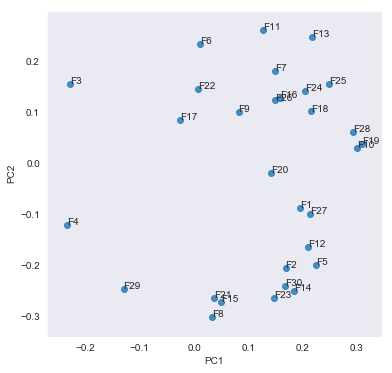

In [74]:
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()